In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
floatX = np.float64

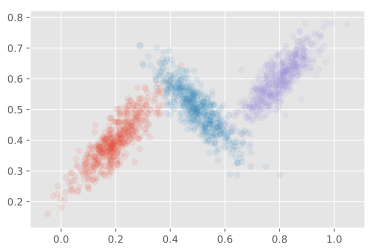

In [2]:
mean_truth = np.array([
    [0.2, 0.4],
    [0.5, 0.5],
    [0.8, 0.6]
])

def rotate(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s], [s, c]])

cov_truth = np.array([np.diag([1, 0.3]) / 10 for i in range(3)])
for c, d in zip(cov_truth, [-1, 1, -1]):
    r = rotate(d * np.pi / 4)
    c[:] = r.T.dot(c).dot(r)

for m, c in zip(mean_truth, cov_truth):
    samples = np.random.normal(size=(500, 2))
    samples = samples.dot(c) + m
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)

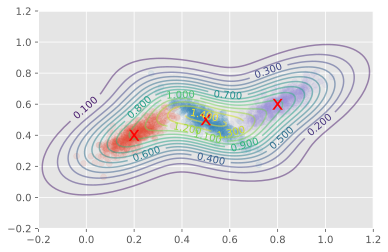

In [27]:
from g902.gmm import  GMM


for m, c in zip(mean_truth, cov_truth):
    samples = np.random.normal(size=(500, 2))
    samples = samples.dot(c) + m
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)

model = GMM(2, 3)
model.mean[:] = mean_truth
model.cov[:] = cov_truth

x = np.linspace(-0.2, 1.2, 100)
y = np.linspace(-0.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
xs = np.stack([X.ravel(), Y.ravel()]).T
Z = model.likelihood(xs).reshape(X.shape)

cs = plt.contour(X, Y, Z, levels=np.arange(0.0, 1.5, 0.1), alpha=0.5)
plt.clabel(cs, inline=1, fontsize=10)
for mx, my in mean_truth:
    plt.text(mx, my, 'x', va='center', ha='center', color='red', fontsize=20)